# 판다스 스타일링

In [1]:
import pandas as pd
import numpy as np

In [3]:
np.random.seed(88)
df = pd.DataFrame({'A' : np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

In [6]:
df.style.highlight_max()

,A,B,C,D,E
0,1.000000,0.106884,nan,0.956563,0.068411
1,2.000000,1.068514,0.997183,-0.931548,0.730430
2,3.000000,-0.171214,-1.288691,1.061436,-0.040501
3,4.000000,-0.903721,-1.554133,nan,0.200526
4,5.000000,-0.747329,1.068081,-0.277024,0.086557
5,6.000000,-0.253221,-1.212041,0.277273,0.552219
6,7.000000,-0.467743,-1.427493,0.885805,2.360634
7,8.000000,-1.522006,-0.215945,0.190327,0.722256
8,9.000000,-0.870716,0.101749,0.555358,0.962261
9,10.000000,1.433499,-0.701818,-0.856952,-0.858158


In [7]:
df.style.highlight_min()

,A,B,C,D,E
0,1.000000,0.106884,nan,0.956563,0.068411
1,2.000000,1.068514,0.997183,-0.931548,0.730430
2,3.000000,-0.171214,-1.288691,1.061436,-0.040501
3,4.000000,-0.903721,-1.554133,nan,0.200526
4,5.000000,-0.747329,1.068081,-0.277024,0.086557
5,6.000000,-0.253221,-1.212041,0.277273,0.552219
6,7.000000,-0.467743,-1.427493,0.885805,2.360634
7,8.000000,-1.522006,-0.215945,0.190327,0.722256
8,9.000000,-0.870716,0.101749,0.555358,0.962261
9,10.000000,1.433499,-0.701818,-0.856952,-0.858158


In [8]:
df.style.highlight_max(axis=1)

,A,B,C,D,E
0,1.000000,0.106884,nan,0.956563,0.068411
1,2.000000,1.068514,0.997183,-0.931548,0.730430
2,3.000000,-0.171214,-1.288691,1.061436,-0.040501
3,4.000000,-0.903721,-1.554133,nan,0.200526
4,5.000000,-0.747329,1.068081,-0.277024,0.086557
5,6.000000,-0.253221,-1.212041,0.277273,0.552219
6,7.000000,-0.467743,-1.427493,0.885805,2.360634
7,8.000000,-1.522006,-0.215945,0.190327,0.722256
8,9.000000,-0.870716,0.101749,0.555358,0.962261
9,10.000000,1.433499,-0.701818,-0.856952,-0.858158


In [9]:
df.style.highlight_max(color='green').highlight_min(color='pink')

,A,B,C,D,E
0,1.000000,0.106884,nan,0.956563,0.068411
1,2.000000,1.068514,0.997183,-0.931548,0.730430
2,3.000000,-0.171214,-1.288691,1.061436,-0.040501
3,4.000000,-0.903721,-1.554133,nan,0.200526
4,5.000000,-0.747329,1.068081,-0.277024,0.086557
5,6.000000,-0.253221,-1.212041,0.277273,0.552219
6,7.000000,-0.467743,-1.427493,0.885805,2.360634
7,8.000000,-1.522006,-0.215945,0.190327,0.722256
8,9.000000,-0.870716,0.101749,0.555358,0.962261
9,10.000000,1.433499,-0.701818,-0.856952,-0.858158


In [10]:
df.style.highlight_null(null_color='green')

,A,B,C,D,E
0,1.000000,0.106884,nan,0.956563,0.068411
1,2.000000,1.068514,0.997183,-0.931548,0.730430
2,3.000000,-0.171214,-1.288691,1.061436,-0.040501
3,4.000000,-0.903721,-1.554133,nan,0.200526
4,5.000000,-0.747329,1.068081,-0.277024,0.086557
5,6.000000,-0.253221,-1.212041,0.277273,0.552219
6,7.000000,-0.467743,-1.427493,0.885805,2.360634
7,8.000000,-1.522006,-0.215945,0.190327,0.722256
8,9.000000,-0.870716,0.101749,0.555358,0.962261
9,10.000000,1.433499,-0.701818,-0.856952,-0.858158


In [3]:
def outname(name):
  return "Name: "+name

def outage(age):
  return "Age: "+age

print(outname('Jmaes Bond'))
print(outname.__name__)

Name: Jmaes Bond
outname


In [4]:
def para(func):
  def wrap(*args, **kwargs):
    return "<p>"+str(func(*args, **kwargs))+"</p>"
  return wrap

@para
def outname(name):
  return 'Name: ' + name

@para
def outage(age):
  return 'Age: ' + str(age)

print(outname('James Bond'))
print(outname.__name__)
print(outage(29))
print(outage.__name__)

<p>Name: James Bond</p>
wrap
<p>Age: 29</p>
wrap


# Linear Regression 실습

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving slr121.csv to slr121.csv


In [42]:
# ReadData

df = pd.read_csv('slr121.csv')
x = df['AnnualFranchiseFee'].values
y = df['StartUpCost'].values

# mean
def get_mean(arr):
  return np.sum(arr)/len(arr)

# variance
def get_variance(arr, mean):
  return (np.sum((arr-mean)**2))/len(arr)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
  final_arr = (arr_x - mean_x)*(arr_y - mean_y)
  return (np.sum(final_arr))/len(final_arr)

In [43]:
# find coeff
def get_coefficients(x, y):
  x_mean = get_mean(x)
  y_mean = get_mean(y)
  m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
  c = y_mean - x_mean*m
  return m, c

# Regression Function
def linear_regression(x_train, y_train, x_test, y_test):
  prediction = []
  m, c = get_coefficients(x_train, y_train)
  for x in x_test:
    y = m*x + c
    prediction.append(y)

  mse = mean_squared_error(prediction, y_test)
  print("The MSE score of the model is: ", mse)
  return prediction

# There are 36 samples out of which 30 are for training and 6 are for the testing
linear_regression(x[:30], y[:30], x[:30], y[:30])

The MSE score of the model is:  8125.422226494004


[1112.8573240388087,
 1237.641407005659,
 1199.7070457837365,
 1182.7364105002448,
 1212.684590412289,
 1262.598223599029,
 1362.4254899725095,
 1262.598223599029,
 1212.684590412289,
 1462.2527563459898,
 1387.3823065658796,
 1487.20957293936,
 1287.5550401923992,
 1312.5118567857694,
 1287.5550401923992,
 1412.3391231592498,
 1372.4082166098576,
 1442.2873030712938,
 1437.29593975262,
 1312.5118567857694,
 1337.4686733791393,
 1202.7018637749409,
 1187.7277738189189,
 1192.719137137593,
 1192.719137137593,
 1292.5464035110733,
 1337.4686733791393,
 1287.5550401923992,
 1362.4254899725095,
 1362.4254899725095]

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv('slr121.csv')
x = df['AnnualFranchiseFee'].values
y = df['StartUpCost'].values

reg = LinearRegression()
reg.fit(x[:30].reshape(-1, 1), y[:30])
prediction = reg.predict(x[30:].reshape(-1, 1))
mse = mean_squared_error(prediction, y[30:])

print("The MSE score of the model is: ", mse)

The MSE score of the model is:  97482.15509744169


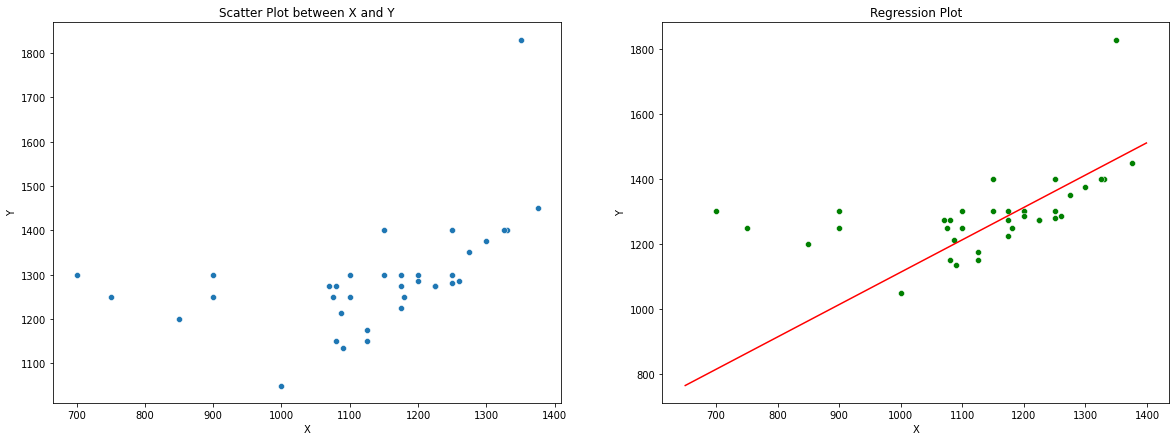

In [46]:
prediction = reg.predict(np.array([i for i in range(650, 1400)]).reshape(-1, 1))

fig = plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.scatterplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot between X and Y')

plt.subplot(1,2,2)
sns.scatterplot(x=x, y=y, color = 'green')
sns.lineplot(x = [i for i in range(650, 1400)], y = prediction, color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()